In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

In [3]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [4]:
X=df.drop('condition',axis=1).values
y=df['condition'].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
class ANN_Model(nn.Module):
    def __init__(self, input_features, hidden1, hidden2, out_features):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        x = torch.relu(self.f_connected1(x))
        x = torch.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [8]:
input_size = X_train.shape[1]
output_size = 2  
model = ANN_Model(input_size, 20, 20, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
epochs = 100
final_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    final_losses.append(loss.item())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6481
Epoch [20/100], Loss: 0.6132
Epoch [30/100], Loss: 0.5699
Epoch [40/100], Loss: 0.5203
Epoch [50/100], Loss: 0.4686
Epoch [60/100], Loss: 0.4206
Epoch [70/100], Loss: 0.3816
Epoch [80/100], Loss: 0.3542
Epoch [90/100], Loss: 0.3361
Epoch [100/100], Loss: 0.3235


In [10]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_test_classes = torch.argmax(y_pred_test, dim=1)

In [11]:
accuracy = accuracy_score(y_test, y_pred_test_classes)
cm = confusion_matrix(y_test, y_pred_test_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(cm)

Accuracy: 80.00%
Confusion Matrix:
[[20  2]
 [10 28]]


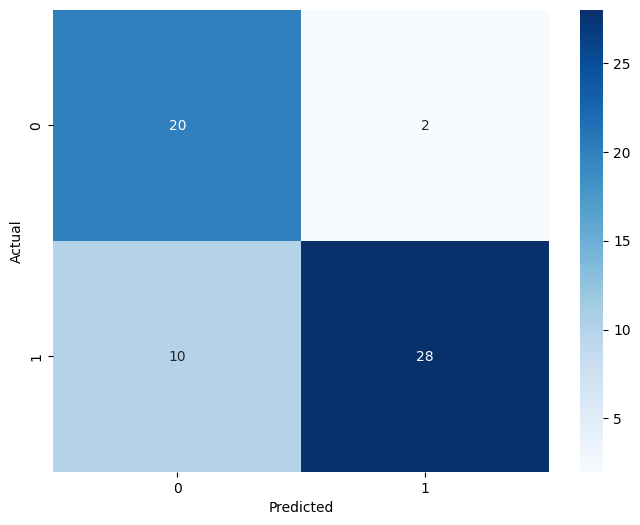

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()